# Loading Libraries for Metric

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install /kaggle/input/pip-install-lifelines/autograd-1.7.0-py3-none-any.whl
!pip install /kaggle/input/pip-install-lifelines/autograd-gamma-0.5.0.tar.gz
!pip install /kaggle/input/pip-install-lifelines/interface_meta-1.3.0-py3-none-any.whl
!pip install /kaggle/input/pip-install-lifelines/formulaic-1.0.2-py3-none-any.whl
!pip install /kaggle/input/pip-install-lifelines/lifelines-0.30.0-py3-none-any.whl

Processing /kaggle/input/pip-install-lifelines/autograd-1.7.0-py3-none-any.whl
autograd is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.
Processing /kaggle/input/pip-install-lifelines/autograd-gamma-0.5.0.tar.gz
  Preparing metadata (setup.py) ... done
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=b0970b8521fe8cafdd62eb7d74a2a01a44309470e70e067a976c7c2600af86ec
  Stored in directory: /root/.cache/pip/wheels/6b/b5/e0/4c79e15c0b5f2c15ecf613c720bb20daab20a666eb67135155
Successfully built autograd-gamma
Processing /kaggle/input/pip-install-lifelines/interface_meta-1.3.0-py3-none-any.whl
Processing /kaggle/input/pip-install-lifelines/formulaic-1.0.2-py3-none-any.whl
Processing /kaggle/input/pip-install-lifelines/lifelines-0.30.0-py3-none-any.whl


# Loading Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from metric import score

In [4]:
train = pd.read_csv('/kaggle/input/equity-post-HCT-survival-predictions/train.csv')
test = pd.read_csv('/kaggle/input/equity-post-HCT-survival-predictions/test.csv')

# Feature engineering

In [5]:
RMV = ["ID","efs","efs_time"]
RACES = train['race_group']
FEATURES = [c for c in train.columns if not c in RMV]
print(f"There are {len(FEATURES)} FEATURES: {FEATURES}")

There are 57 FEATURES: ['dri_score', 'psych_disturb', 'cyto_score', 'diabetes', 'hla_match_c_high', 'hla_high_res_8', 'tbi_status', 'arrhythmia', 'hla_low_res_6', 'graft_type', 'vent_hist', 'renal_issue', 'pulm_severe', 'prim_disease_hct', 'hla_high_res_6', 'cmv_status', 'hla_high_res_10', 'hla_match_dqb1_high', 'tce_imm_match', 'hla_nmdp_6', 'hla_match_c_low', 'rituximab', 'hla_match_drb1_low', 'hla_match_dqb1_low', 'prod_type', 'cyto_score_detail', 'conditioning_intensity', 'ethnicity', 'year_hct', 'obesity', 'mrd_hct', 'in_vivo_tcd', 'tce_match', 'hla_match_a_high', 'hepatic_severe', 'donor_age', 'prior_tumor', 'hla_match_b_low', 'peptic_ulcer', 'age_at_hct', 'hla_match_a_low', 'gvhd_proph', 'rheum_issue', 'sex_match', 'hla_match_b_high', 'race_group', 'comorbidity_score', 'karnofsky_score', 'hepatic_mild', 'tce_div_match', 'donor_related', 'melphalan_dose', 'hla_low_res_8', 'cardiac', 'hla_match_drb1_high', 'pulm_moderate', 'hla_low_res_10']


In [6]:
#filling hla_nmdp_6
train["hla_nmdp_6"].fillna(train[["hla_match_a_low", "hla_match_b_low", "hla_match_drb1_high"]].sum(axis=1), inplace=True)
test["hla_nmdp_6"].fillna(test[["hla_match_a_low", "hla_match_b_low", "hla_match_drb1_high"]].sum(axis=1), inplace=True)  

#filling hla_low_res_6
train["hla_low_res_6"].fillna(train[["hla_match_a_low", "hla_match_b_low", "hla_match_drb1_low"]].sum(axis=1), inplace=True)
test["hla_low_res_6"].fillna(test[["hla_match_a_low", "hla_match_b_low", "hla_match_drb1_low"]].sum(axis=1), inplace=True)  

#filling hla_high_res_6
train["hla_high_res_6"].fillna(train[["hla_match_a_high", "hla_match_b_high", "hla_match_drb1_high"]].sum(axis=1), inplace=True)
test["hla_high_res_6"].fillna(test[["hla_match_a_high", "hla_match_b_high", "hla_match_drb1_high"]].sum(axis=1), inplace=True)  

#filling hla_low_res_8
train['hla_low_res_8'].fillna(train[["hla_match_a_low", "hla_match_b_low", "hla_match_c_low", "hla_match_drb1_low"]].sum(axis=1), inplace=True)
test['hla_low_res_8'].fillna(test[["hla_match_a_low", "hla_match_b_low", "hla_match_c_low", "hla_match_drb1_low"]].sum(axis=1), inplace=True)

#filling hla_high_res_8
train["hla_high_res_8"].fillna(train[["hla_match_a_high", "hla_match_b_high", "hla_match_c_high", "hla_match_drb1_high"]].sum(axis=1), inplace=True)
test["hla_high_res_8"].fillna(test[["hla_match_a_high", "hla_match_b_high", "hla_match_c_high", "hla_match_drb1_high"]].sum(axis=1), inplace=True)

#filling hla_low_res_10
train["hla_low_res_10"].fillna(train[["hla_match_a_low", "hla_match_b_low", "hla_match_c_low", "hla_match_drb1_low", "hla_match_dqb1_low"]].sum(axis=1), inplace=True)
test["hla_low_res_10"].fillna(test[["hla_match_a_low", "hla_match_b_low", "hla_match_c_low", "hla_match_drb1_low", "hla_match_dqb1_low"]].sum(axis=1), inplace=True)

#filling hla_high_res_10
train["hla_high_res_10"].fillna(train[["hla_match_a_high", "hla_match_b_high", "hla_match_c_high", "hla_match_drb1_high", "hla_match_dqb1_high"]].sum(axis=1), inplace=True)
test["hla_high_res_10"].fillna(test[["hla_match_a_high", "hla_match_b_high", "hla_match_c_high", "hla_match_drb1_high", "hla_match_dqb1_high"]].sum(axis=1), inplace=True)

In [7]:
CATS = []
for c in FEATURES:
    if train[c].dtype=="object":
        CATS.append(c)
        train[c] = train[c].fillna("NAN")
        test[c] = test[c].fillna("NAN")
        train[c] = train[c].astype('category')
        test[c] = test[c].astype('category')
    else:
        train[c] = train[c].fillna(-1)
        test[c] = test[c].fillna(-1) 
print(f"In these features, there are {len(CATS)} CATEGORICAL FEATURES: {CATS}")

In these features, there are 35 CATEGORICAL FEATURES: ['dri_score', 'psych_disturb', 'cyto_score', 'diabetes', 'tbi_status', 'arrhythmia', 'graft_type', 'vent_hist', 'renal_issue', 'pulm_severe', 'prim_disease_hct', 'cmv_status', 'tce_imm_match', 'rituximab', 'prod_type', 'cyto_score_detail', 'conditioning_intensity', 'ethnicity', 'obesity', 'mrd_hct', 'in_vivo_tcd', 'tce_match', 'hepatic_severe', 'prior_tumor', 'peptic_ulcer', 'gvhd_proph', 'rheum_issue', 'sex_match', 'race_group', 'hepatic_mild', 'tce_div_match', 'donor_related', 'melphalan_dose', 'cardiac', 'pulm_moderate']


In [8]:
from sklearn.model_selection import StratifiedKFold
FOLDS = 5
kf = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=42)

# Kaplan Meier target

In [9]:
from lifelines import KaplanMeierFitter

def transform_survival_probability_kmf(df):

    oof = np.zeros(len(train))
    
    kf = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=42)
    for i, (train_index, test_index) in enumerate(kf.split(df, RACES)):

        df_train = df.iloc[train_index,:].copy()
        df_val = df.iloc[test_index,:].copy()
        
        kmf = KaplanMeierFitter()
        kmf.fit(durations=df_train['efs_time'], event_observed=df_train['efs'])

        oof[test_index] = kmf.survival_function_at_times(df_val['efs_time']).values

    return oof
    
train["KaplanMeier"] = transform_survival_probability_kmf(train)

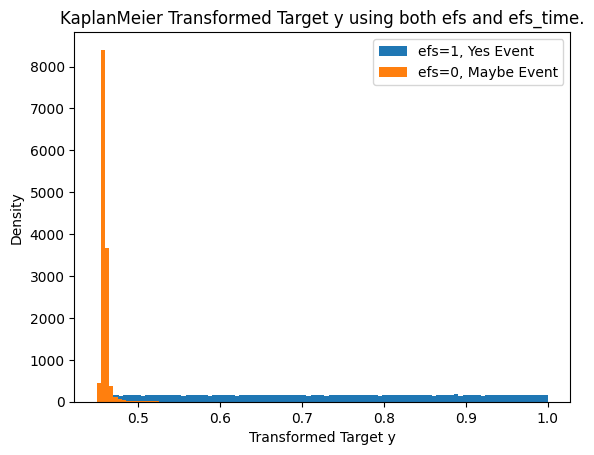

In [10]:
plt.hist(train.loc[train.efs==1,"KaplanMeier"],bins=100,label="efs=1, Yes Event")
plt.hist(train.loc[train.efs==0,"KaplanMeier"],bins=100,label="efs=0, Maybe Event")
plt.xlabel("Transformed Target y")
plt.ylabel("Density")
plt.title("KaplanMeier Transformed Target y using both efs and efs_time.")
plt.legend()
plt.show()

# NelsonAalen target

In [11]:
from lifelines import NelsonAalenFitter

def transform_survival_probability_naf(df):

    oof = np.zeros(len(train))
    
    kf = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=42)
    for i, (train_index, test_index) in enumerate(kf.split(df, RACES)):

        df_train = df.iloc[train_index,:].copy()
        df_val = df.iloc[test_index,:].copy()
        
        naf = NelsonAalenFitter()
        naf.fit(durations=df_train['efs_time'], event_observed=df_train['efs'])

        oof[test_index] = -naf.cumulative_hazard_at_times(df_val['efs_time']).values

    return oof

train["NelsonAalen"] = transform_survival_probability_naf(train)

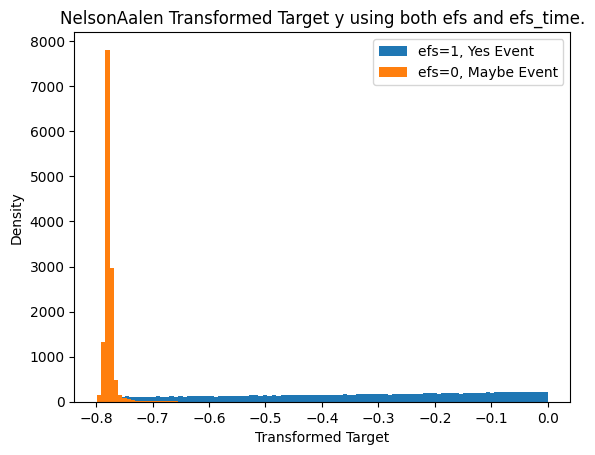

In [12]:
plt.hist(train.loc[train.efs==1,"NelsonAalen"],bins=100,label="efs=1, Yes Event")
plt.hist(train.loc[train.efs==0,"NelsonAalen"],bins=100,label="efs=0, Maybe Event")
plt.xlabel("Transformed Target")
plt.ylabel("Density")
plt.title("NelsonAalen Transformed Target y using both efs and efs_time.")
plt.legend()
plt.show()

# COX target

In [13]:
from lifelines import CoxPHFitter

def transform_survival_probability_cox(df):

    oof = np.zeros(len(train))

    df = pd.get_dummies(df, columns=CATS, drop_first=True).drop(['ID', 'KaplanMeier', 'NelsonAalen'], axis=1)
    
    kf = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=42)
    for i, (train_index, test_index) in enumerate(kf.split(df, RACES)):

        df_train = df.iloc[train_index].copy()
        df_val = df.iloc[test_index].copy()

        df_train = df_train.loc[:, df_train.nunique() > 1].copy()
        df_val = df_val[df_train.columns].copy()

        
        cph = CoxPHFitter(penalizer=0.01)
        cph.fit(df=df_train, duration_col='efs_time', event_col='efs')

        oof[test_index] = cph.predict_partial_hazard(df_val)

    return oof

train["CoxPH"] = transform_survival_probability_cox(train)

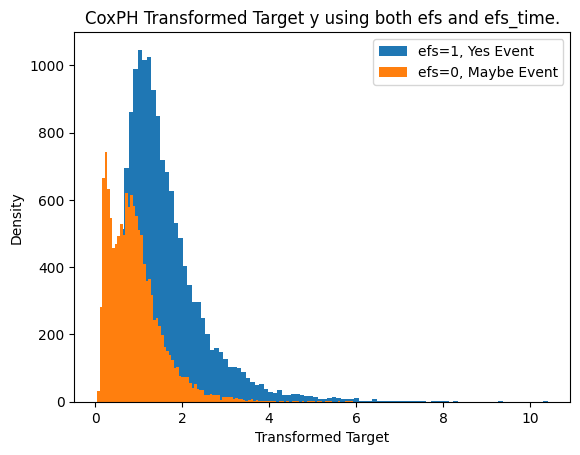

In [14]:
plt.hist(train.loc[train.efs==1,"CoxPH"],bins=100,label="efs=1, Yes Event")
plt.hist(train.loc[train.efs==0,"CoxPH"],bins=100,label="efs=0, Maybe Event")
plt.xlabel("Transformed Target")
plt.ylabel("Density")
plt.title("CoxPH Transformed Target y using both efs and efs_time.")
plt.legend()
plt.show()

# Cox Loss Target

In [15]:
train["CoxLoss"] = train.efs_time.copy()
train.loc[train.efs==0,"CoxLoss"] *= -1

# Evaluation func

In [16]:
from metric import score
def res(df, preds):
    y_true = df[["ID","efs","efs_time","race_group"]].copy()
    y_pred = df[["ID"]].copy()
    y_pred["prediction"] = preds
    return score(y_true.copy(), y_pred.copy(), "ID")

# Model Parameters

In [17]:
param_cat = {
        'loss_function': 'RMSE',
        'learning_rate': 0.03,
        'random_state': 42,
        'task_type': 'CPU',
        'num_trees': 6000,
        'reg_lambda': 8.0,
        'depth': 8
    }

param_cat_cox1 = {
        'task_type': 'CPU',
        'loss_function': "Cox",
        'iterations': 1900,
        'learning_rate': 0.026022154701247448,
        'depth': 6,
        'subsample': 0.6674150207128257,
        'min_data_in_leaf': 89,
        'l2_leaf_reg': 7.988614815866904,
        'bootstrap_type': 'Bernoulli',
        'grow_policy': 'Lossguide',
        'use_best_model': False,
        'random_state': 42
}

param_cat_cox2 = {
        'task_type': 'CPU',
        'loss_function': "Cox",
        'iterations': 1900,
        'learning_rate': 0.026022154701247448,
        'depth': 6,
        'subsample': 0.6674150207128257,
        'min_data_in_leaf': 89,
        'l2_leaf_reg': 7.988614815866904,
        'bootstrap_type': 'Bernoulli',
        'grow_policy': 'Depthwise', 
        'use_best_model': False,
        'random_state': 42
}

param_lgb = {
        'objective': 'regression',
        'metric': 'rmse',
        'device': 'cpu',
        'verbose': -1,
        "bagging_freq": 1,
        'n_estimators': 9800,
        'learning_rate': 0.0025562611410098906,
        'max_depth': 11,
        'subsample': 0.7000302358347922,
        'colsample_bytree': 0.34454787171802054,
        'min_data_in_leaf': 52
    }


param_xgb = {
        'device': 'cpu',
        'enable_categorical': True, 
        "objective": "reg:squarederror",
        "verbosity": 0,
        'n_estimators': 9400,
        'learning_rate': 0.01462545658882346,
        'max_depth': 4,
        'subsample': 0.8427706960687078,
        'colsample_bytree': 0.2630880900000106,
        'min_child_weight': 50,
        'reg_lambda': 29.0
}



param_xgb_cox = {
        'device': "cpu",
        'max_depth': 3,  
        'colsample_bytree': 0.5,  
        'subsample': 0.8,  
        'n_estimators': 2000,  
        'learning_rate': 0.02,  
        'enable_categorical': True,
        'min_child_weight': 80,
        'objective': 'survival:cox',
        'eval_metric': 'cox-nloglik',
        'seed': 42
}


# XGBoost KaplanMeier

In [18]:
from xgboost import XGBRegressor, XGBClassifier
import xgboost as xgb
print("Using XGBoost version",xgb.__version__)

Using XGBoost version 2.0.3


In [19]:
%%time
    
oof_xgb_km = np.zeros(len(train))
pred_xgb_km = np.zeros(len(test))

for i, (train_index, test_index) in enumerate(kf.split(train, train['race_group'])):

    print("#"*25)
    print(f"### Fold {i+1}")
    print("#"*25)
    
    X_train = train.loc[train_index,FEATURES].copy()
    y_train = train.loc[train_index,"KaplanMeier"]
    X_val = train.loc[test_index,FEATURES].copy()
    y_val = train.loc[test_index,"KaplanMeier"]
    X_test = test[FEATURES].copy()
    
    model_xgb_km = XGBRegressor(**param_xgb)
    model_xgb_km.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],  
        verbose=0,
        early_stopping_rounds=300,
    )

    # INFER OOF
    oof_xgb_km[test_index] = model_xgb_km.predict(X_val)
    # INFER TEST
    pred_xgb_km += model_xgb_km.predict(X_test)

# COMPUTE AVERAGE TEST PREDS
pred_xgb_km /= FOLDS

#########################
### Fold 1
#########################
#########################
### Fold 2
#########################
#########################
### Fold 3
#########################
#########################
### Fold 4
#########################
#########################
### Fold 5
#########################
CPU times: user 9min 8s, sys: 1.95 s, total: 9min 10s
Wall time: 2min 21s


In [20]:
print('CV for XGBoost KaplanMeier', res(train, oof_xgb_km))

CV for XGBoost KaplanMeier 0.6746456133097669


# XGBoost NelsonAalen

In [21]:
%%time
    
oof_xgb_na = np.zeros(len(train))
pred_xgb_na = np.zeros(len(test))

for i, (train_index, test_index) in enumerate(kf.split(train, train['race_group'])):

    print("#"*25)
    print(f"### Fold {i+1}")
    print("#"*25)
    
    X_train = train.loc[train_index,FEATURES].copy()
    y_train = train.loc[train_index,"NelsonAalen"]
    X_val = train.loc[test_index,FEATURES].copy()
    y_val = train.loc[test_index,"NelsonAalen"]
    X_test = test[FEATURES].copy()
    
    model_xgb_na = XGBRegressor(**param_xgb)
    
    model_xgb_na.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],  
        verbose=0,
        early_stopping_rounds=300,
    )

    # INFER OOF
    oof_xgb_na[test_index] = model_xgb_na.predict(X_val)
    # INFER TEST
    pred_xgb_na += model_xgb_na.predict(X_test)

# COMPUTE AVERAGE TEST PREDS
pred_xgb_na /= FOLDS

#########################
### Fold 1
#########################
#########################
### Fold 2
#########################
#########################
### Fold 3
#########################
#########################
### Fold 4
#########################
#########################
### Fold 5
#########################
CPU times: user 8min 36s, sys: 1.88 s, total: 8min 38s
Wall time: 2min 12s


In [22]:
print('CV for XGBoost NelsonAalen', res(train, oof_xgb_na))

CV for XGBoost NelsonAalen 0.6775431349669581


# XGBoost CoxPH

In [23]:
%%time
    
oof_xgb_coxph = np.zeros(len(train))
pred_xgb_coxph = np.zeros(len(test))

for i, (train_index, test_index) in enumerate(kf.split(train, train['race_group'])):

    print("#"*25)
    print(f"### Fold {i+1}")
    print("#"*25)
    
    X_train = train.loc[train_index,FEATURES].copy()
    y_train = train.loc[train_index,"CoxPH"]
    X_val = train.loc[test_index,FEATURES].copy()
    y_val = train.loc[test_index,"CoxPH"]
    X_test = test[FEATURES].copy()
    
    model_xgb_coxph = XGBRegressor(**param_xgb)
    
    model_xgb_coxph.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],  
        verbose=0,
        early_stopping_rounds=300,
    )

    # INFER OOF
    oof_xgb_coxph[test_index] = model_xgb_coxph.predict(X_val)
    # INFER TEST
    pred_xgb_coxph += model_xgb_coxph.predict(X_test)

# COMPUTE AVERAGE TEST PREDS
pred_xgb_coxph /= FOLDS

#########################
### Fold 1
#########################
#########################
### Fold 2
#########################
#########################
### Fold 3
#########################
#########################
### Fold 4
#########################
#########################
### Fold 5
#########################
CPU times: user 19min 16s, sys: 4.19 s, total: 19min 20s
Wall time: 4min 57s


In [24]:
print('CV for XGBoost CoxPH', res(train, oof_xgb_coxph))

CV for XGBoost CoxPH 0.6611798737249636


# XGBoost Cox Loss

In [25]:
%%time
    
oof_xgb_cox = np.zeros(len(train))
pred_xgb_cox = np.zeros(len(test))

for i, (train_index, test_index) in enumerate(kf.split(train, train['race_group'])):

    print("#"*25)
    print(f"### Fold {i+1}")
    print("#"*25)
    
    X_train = train.loc[train_index,FEATURES].copy()
    y_train = train.loc[train_index,"CoxLoss"]    
    X_val = train.loc[test_index,FEATURES].copy()
    y_val = train.loc[test_index,"CoxLoss"]
    X_test = test[FEATURES].copy()

    model_xgb_cox = XGBRegressor(**param_xgb_cox)
    model_xgb_cox.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=0)
    
    # INFER OOF
    oof_xgb_cox[test_index] = model_xgb_cox.predict(X_val)
    # INFER TEST
    pred_xgb_cox += model_xgb_cox.predict(X_test)

# COMPUTE AVERAGE TEST PREDS
pred_xgb_cox /= FOLDS

#########################
### Fold 1
#########################
#########################
### Fold 2
#########################
#########################
### Fold 3
#########################
#########################
### Fold 4
#########################
#########################
### Fold 5
#########################
CPU times: user 4min 29s, sys: 746 ms, total: 4min 30s
Wall time: 1min 9s


In [26]:
print('CV for XGBoost Cox', res(train, oof_xgb_cox))

CV for XGBoost Cox 0.6723004800255978


# CatBoost KaplanMeier

In [27]:
import catboost as cb
from catboost import CatBoostRegressor
import optuna
print("Using CatBoost version",cb.__version__)

Using CatBoost version 1.2.7


In [28]:
%%time
    
oof_cat_km = np.zeros(len(train))
pred_cat_km = np.zeros(len(test))

for i, (train_index, test_index) in enumerate(kf.split(train, RACES)):

    print("#"*25)
    print(f"### Fold {i+1}")
    print("#"*25)
    
    X_train = train.loc[train_index,FEATURES].copy()
    y_train = train.loc[train_index,"KaplanMeier"]
    X_val = train.loc[test_index,FEATURES].copy()
    y_val = train.loc[test_index,"KaplanMeier"]
    X_test = test[FEATURES].copy()


    model_cat_km = CatBoostRegressor(**param_cat)
    
    model_cat_km.fit(X_train, y_train, eval_set=[(X_val, y_val)], cat_features=CATS, verbose=0, early_stopping_rounds=300)
    
    # INFER OOF
    oof_cat_km[test_index] = model_cat_km.predict(X_val)
    # INFER TEST
    pred_cat_km += model_cat_km.predict(X_test)

# COMPUTE AVERAGE TEST PREDS
pred_cat_km /= FOLDS

#########################
### Fold 1
#########################
#########################
### Fold 2
#########################
#########################
### Fold 3
#########################
#########################
### Fold 4
#########################
#########################
### Fold 5
#########################
CPU times: user 2h 45min 25s, sys: 28min 5s, total: 3h 13min 31s
Wall time: 52min 56s


In [29]:
print('CV for CatBoost KaplanMeier', res(train, oof_cat_km))

CV for CatBoost KaplanMeier 0.6742959314193937


# LightGBM KaplanMeier

In [30]:
from lightgbm import LGBMRegressor
import lightgbm as lgb
print("Using LightGBM version",lgb.__version__)

Using LightGBM version 4.5.0


In [31]:
%%time


    
oof_lgb_km = np.zeros(len(train))
pred_lgb_km = np.zeros(len(test))

for i, (train_index, test_index) in enumerate(kf.split(train, RACES)):

    print("#"*25)
    print(f"### Fold {i+1}")
    print("#"*25)
    
    X_train = train.loc[train_index,FEATURES].copy()
    y_train = train.loc[train_index,"KaplanMeier"]
    X_val = train.loc[test_index,FEATURES].copy()
    y_val = train.loc[test_index,"KaplanMeier"]
    X_test = test[FEATURES].copy()

    model_lgb_km = LGBMRegressor(**param_lgb)
    
    model_lgb_km.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        eval_metric='rmse',
        callbacks=[lgb.early_stopping(300, verbose=0), lgb.log_evaluation(0)]
    )
    
    # INFER OOF
    oof_lgb_km[test_index] = model_lgb_km.predict(X_val)
    # INFER TEST
    pred_lgb_km += model_lgb_km.predict(X_test)

# COMPUTE AVERAGE TEST PREDS
pred_lgb_km /= FOLDS

#########################
### Fold 1
#########################
#########################
### Fold 2
#########################
#########################
### Fold 3
#########################
#########################
### Fold 4
#########################
#########################
### Fold 5
#########################
CPU times: user 10min 38s, sys: 10.6 s, total: 10min 49s
Wall time: 5min 26s


In [32]:
print('CV for LightGBM KaplanMeier', res(train, oof_lgb_km))

CV for LightGBM KaplanMeier 0.6744433864941184


# CatBoost NelsonAalen

In [33]:
%%time
    
oof_cat_na = np.zeros(len(train))
pred_cat_na = np.zeros(len(test))

for i, (train_index, test_index) in enumerate(kf.split(train, RACES)):

    print("#"*25)
    print(f"### Fold {i+1}")
    print("#"*25)
    
    X_train = train.loc[train_index,FEATURES].copy()
    y_train = train.loc[train_index,"NelsonAalen"]
    X_val = train.loc[test_index,FEATURES].copy()
    y_val = train.loc[test_index,"NelsonAalen"]
    X_test = test[FEATURES].copy()

    model_cat_na = CatBoostRegressor(**param_cat)
    
    model_cat_na.fit(X_train, y_train, eval_set=[(X_val, y_val)], cat_features=CATS, verbose=0, early_stopping_rounds=300)
    
    # INFER OOF
    oof_cat_na[test_index] = model_cat_na.predict(X_val)
    # INFER TEST
    pred_cat_na += model_cat_na.predict(X_test)

# COMPUTE AVERAGE TEST PREDS
pred_cat_na /= FOLDS

#########################
### Fold 1
#########################
#########################
### Fold 2
#########################
#########################
### Fold 3
#########################
#########################
### Fold 4
#########################
#########################
### Fold 5
#########################
CPU times: user 2h 29min 43s, sys: 25min 6s, total: 2h 54min 49s
Wall time: 47min 50s


In [34]:
print('CV for CatBoost NelsonAalen', res(train, oof_cat_na))

CV for CatBoost NelsonAalen 0.6765293098604126


# LightGBM NelsonAalen

In [35]:
%%time
    
oof_lgb_na = np.zeros(len(train))
pred_lgb_na = np.zeros(len(test))

for i, (train_index, test_index) in enumerate(kf.split(train, RACES)):

    print("#"*25)
    print(f"### Fold {i+1}")
    print("#"*25)
    
    X_train = train.loc[train_index,FEATURES].copy()
    y_train = train.loc[train_index,"NelsonAalen"]
    X_val = train.loc[test_index,FEATURES].copy()
    y_val = train.loc[test_index,"NelsonAalen"]
    X_test = test[FEATURES].copy()

    model_lgb_na = LGBMRegressor(**param_lgb)
    
    model_lgb_na.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        eval_metric='rmse',
        callbacks=[lgb.early_stopping(300, verbose=0), lgb.log_evaluation(0)]
    )
    
    # INFER OOF
    oof_lgb_na[test_index] = model_lgb_na.predict(X_val)
    # INFER TEST
    pred_lgb_na += model_lgb_na.predict(X_test)

# COMPUTE AVERAGE TEST PREDS
pred_lgb_na /= FOLDS

#########################
### Fold 1
#########################
#########################
### Fold 2
#########################
#########################
### Fold 3
#########################
#########################
### Fold 4
#########################
#########################
### Fold 5
#########################
CPU times: user 8min 50s, sys: 10.8 s, total: 9min
Wall time: 4min 31s


In [36]:
print('CV for LightGBM NelsonAalen', res(train, oof_lgb_na))

CV for LightGBM NelsonAalen 0.6767590506625597


# CatBoost CoxPH

In [37]:
%%time
    
oof_cat_coxph = np.zeros(len(train))
pred_cat_coxph = np.zeros(len(test))

for i, (train_index, test_index) in enumerate(kf.split(train, RACES)):

    print("#"*25)
    print(f"### Fold {i+1}")
    print("#"*25)
    
    X_train = train.loc[train_index,FEATURES].copy()
    y_train = train.loc[train_index,"CoxPH"]
    X_val = train.loc[test_index,FEATURES].copy()
    y_val = train.loc[test_index,"CoxPH"]
    X_test = test[FEATURES].copy()

    model_cat_coxph = CatBoostRegressor(**param_cat)
    
    model_cat_coxph.fit(X_train, y_train, eval_set=[(X_val, y_val)], cat_features=CATS, verbose=0, early_stopping_rounds=300)
    
    # INFER OOF
    oof_cat_coxph[test_index] = model_cat_coxph.predict(X_val)
    # INFER TEST
    pred_cat_coxph += model_cat_coxph.predict(X_test)

# COMPUTE AVERAGE TEST PREDS
pred_cat_coxph /= FOLDS

#########################
### Fold 1
#########################
#########################
### Fold 2
#########################
#########################
### Fold 3
#########################
#########################
### Fold 4
#########################
#########################
### Fold 5
#########################
CPU times: user 4h 11min 14s, sys: 44min 4s, total: 4h 55min 18s
Wall time: 1h 21min 9s


In [38]:
print('CV for CatBoost CoxPH', res(train, oof_cat_coxph))

CV for CatBoost CoxPH 0.6607029561427864


# LightGBM CoxPH

In [39]:
%%time
    
oof_lgb_coxph = np.zeros(len(train))
pred_lgb_coxph = np.zeros(len(test))

for i, (train_index, test_index) in enumerate(kf.split(train, RACES)):

    print("#"*25)
    print(f"### Fold {i+1}")
    print("#"*25)
    
    X_train = train.loc[train_index,FEATURES].copy()
    y_train = train.loc[train_index,"CoxPH"]
    X_val = train.loc[test_index,FEATURES].copy()
    y_val = train.loc[test_index,"CoxPH"]
    X_test = test[FEATURES].copy()

    model_lgb_coxph = LGBMRegressor(**param_lgb)
    
    model_lgb_coxph.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        eval_metric='rmse',
        callbacks=[lgb.early_stopping(300, verbose=0), lgb.log_evaluation(0)]
    )
    
    # INFER OOF
    oof_lgb_coxph[test_index] = model_lgb_coxph.predict(X_val)
    # INFER TEST
    pred_lgb_coxph += model_lgb_coxph.predict(X_test)

# COMPUTE AVERAGE TEST PREDS
pred_lgb_coxph /= FOLDS

#########################
### Fold 1
#########################
#########################
### Fold 2
#########################
#########################
### Fold 3
#########################
#########################
### Fold 4
#########################
#########################
### Fold 5
#########################
CPU times: user 11min 14s, sys: 11.6 s, total: 11min 25s
Wall time: 5min 44s


In [40]:
print('CV for LightGBM CoxPH', res(train, oof_lgb_coxph))

CV for LightGBM CoxPH 0.6599234209648115


# CatBoost with Cox loss 1

In [41]:
%%time
    
oof_cat_cox1 = np.zeros(len(train))
pred_cat_cox1 = np.zeros(len(test))

for i, (train_index, test_index) in enumerate(kf.split(train, RACES)):

    print("#"*25)
    print(f"### Fold {i+1}")
    print("#"*25)
    
    X_train = train.loc[train_index,FEATURES].copy()
    y_train = train.loc[train_index,"CoxLoss"]    
    X_val = train.loc[test_index,FEATURES].copy()
    y_val = train.loc[test_index,"CoxLoss"]
    X_test = test[FEATURES].copy()

    model_cat_cox1 = CatBoostRegressor(**param_cat_cox1)
    
    model_cat_cox1.fit(X_train, y_train, eval_set=[(X_val, y_val)], cat_features=CATS, verbose=0)
    
    # INFER OOF
    oof_cat_cox1[test_index] = model_cat_cox1.predict(X_val)
    # INFER TEST
    pred_cat_cox1 += model_cat_cox1.predict(X_test)

# COMPUTE AVERAGE TEST PREDS
pred_cat_cox1 /= FOLDS

#########################
### Fold 1
#########################
#########################
### Fold 2
#########################
#########################
### Fold 3
#########################
#########################
### Fold 4
#########################
#########################
### Fold 5
#########################
CPU times: user 28min 54s, sys: 2min 25s, total: 31min 19s
Wall time: 9min 30s


In [42]:
print('CV for CatBoost Cox1', res(train, oof_cat_cox1))

CV for CatBoost Cox1 0.6723494892653509


# CatBoost with Cox Loss 2

In [43]:
%%time
    
oof_cat_cox2 = np.zeros(len(train))
pred_cat_cox2 = np.zeros(len(test))

for i, (train_index, test_index) in enumerate(kf.split(train, RACES)):

    print("#"*25)
    print(f"### Fold {i+1}")
    print("#"*25)
    
    X_train = train.loc[train_index,FEATURES].copy()
    y_train = train.loc[train_index,"CoxLoss"]    
    X_val = train.loc[test_index,FEATURES].copy()
    y_val = train.loc[test_index,"CoxLoss"]
    X_test = test[FEATURES].copy()

    model_cat_cox2 = CatBoostRegressor(**param_cat_cox2)
    
    model_cat_cox2.fit(X_train, y_train, eval_set=[(X_val, y_val)], cat_features=CATS, verbose=0)
    
    # INFER OOF
    oof_cat_cox2[test_index] = model_cat_cox2.predict(X_val)
    # INFER TEST
    pred_cat_cox2 += model_cat_cox2.predict(X_test)

# COMPUTE AVERAGE TEST PREDS
pred_cat_cox2 /= FOLDS

#########################
### Fold 1
#########################
#########################
### Fold 2
#########################
#########################
### Fold 3
#########################
#########################
### Fold 4
#########################
#########################
### Fold 5
#########################
CPU times: user 20min 30s, sys: 1min 29s, total: 21min 59s
Wall time: 7min 4s


In [44]:
print('CV for CatBoost Cox2', res(train, oof_cat_cox2))

CV for CatBoost Cox2 0.6720081213695862


# Resulting CV scores

In [45]:
print(10 * '#')
print('RESULTS')
print(10 * '#')
print('CV for CatBoost KaplanMeier', res(train, oof_cat_km))
print('CV for XGBoost KaplanMeier ', res(train, oof_xgb_km))
print('CV for LightGBM KaplanMeier', res(train, oof_lgb_km))
print(10 * '#')
print('CV for CatBoost NelsonAalen', res(train, oof_cat_na))
print('CV for XGBoost NelsonAalen ', res(train, oof_xgb_na))
print('CV for LightGBM NelsonAalen', res(train, oof_lgb_na))
print(10 * '#')
print('CV for CatBoost CoxPH      ', res(train, oof_cat_coxph))
print('CV for XGBoost CoxPH       ', res(train, oof_xgb_coxph))
print('CV for LightGBM CoxPH      ', res(train, oof_lgb_coxph))
print(10 * '#')
print('CV for CatBoost Cox Loss 1 ', res(train, oof_cat_cox1))
print('CV for CatBoost Cox Loss 2 ', res(train, oof_cat_cox2))
print('CV for XGBoost Cox Loss    ', res(train, oof_xgb_cox))

##########
RESULTS
##########
CV for CatBoost KaplanMeier 0.6742959314193937
CV for XGBoost KaplanMeier  0.6746456133097669
CV for LightGBM KaplanMeier 0.6744433864941184
##########
CV for CatBoost NelsonAalen 0.6765293098604126
CV for XGBoost NelsonAalen  0.6775431349669581
CV for LightGBM NelsonAalen 0.6767590506625597
##########
CV for CatBoost CoxPH       0.6607029561427864
CV for XGBoost CoxPH        0.6611798737249636
CV for LightGBM CoxPH       0.6599234209648115
##########
CV for CatBoost Cox Loss 1  0.6723494892653509
CV for CatBoost Cox Loss 2  0.6720081213695862
CV for XGBoost Cox Loss     0.6723004800255978


# HUGE FUCKING ENSEMBLING

In [46]:
from scipy.stats import rankdata

In [47]:
models = [
    rankdata(oof_cat_km),
    rankdata(oof_xgb_km),
    rankdata(oof_lgb_km),
    rankdata(oof_cat_na),
    rankdata(oof_xgb_na),
    rankdata(oof_lgb_na),
    rankdata(oof_cat_coxph),
    rankdata(oof_xgb_coxph),
    rankdata(oof_lgb_coxph),
    rankdata(oof_cat_cox1),
    rankdata(oof_cat_cox2),
    rankdata(oof_xgb_cox),
]

In [48]:
def objective(trial):
    coefs = [
        trial.suggest_int("cat_km", 1, 10),
        trial.suggest_int("xgb_km", 1, 10),
        trial.suggest_int("lgb_km", 1, 10),
        trial.suggest_int("cat_na", 1, 10),
        trial.suggest_int("xgb_na", 1, 10),
        trial.suggest_int("lgb_na", 1, 10),
        trial.suggest_int("cat_coxph", 1, 10),
        trial.suggest_int("xgb_coxph", 1, 10),
        trial.suggest_int("lgb_coxph", 1, 10),
        trial.suggest_int("cat_cox1", 1, 10),
        trial.suggest_int("cat_cox2", 1, 10),
        trial.suggest_int("xgb_cox", 1, 10),
    ]

    preds = 0
    
    for coef, model in zip(coefs, models):
        preds += coef * model
    return res(train, preds)

In [49]:
study = optuna.create_study(direction="maximize")
optuna.logging.set_verbosity(optuna.logging.WARNING)
study.optimize(objective, n_trials=2000, show_progress_bar=True)

[I 2025-01-27 12:52:08,645] A new study created in memory with name: no-name-d05e0177-0afa-4508-afd9-46a5870bdcd8


  0%|          | 0/2000 [00:00<?, ?it/s]

In [50]:
print("Best trial:")
trial = study.best_trial
coefs = trial.params.values()

print("  Value: {}".format(trial.value))

print("  Coefs: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Best trial:
  Value: 0.6819545763716988
  Coefs: 
    cat_km: 10
    xgb_km: 3
    lgb_km: 9
    cat_na: 8
    xgb_na: 10
    lgb_na: 1
    cat_coxph: 2
    xgb_coxph: 9
    lgb_coxph: 1
    cat_cox1: 4
    cat_cox2: 3
    xgb_cox: 7


# Making submission

In [51]:
pred_models = [
    rankdata(pred_cat_km),
    rankdata(pred_xgb_km),
    rankdata(pred_lgb_km),
    rankdata(pred_cat_na),
    rankdata(pred_xgb_na),
    rankdata(pred_lgb_na),
    rankdata(pred_cat_coxph),
    rankdata(pred_xgb_coxph),
    rankdata(pred_lgb_coxph),
    rankdata(pred_cat_cox1),
    rankdata(pred_cat_cox2), 
    rankdata(pred_xgb_cox)
]

In [52]:
ids = test['ID']
preds = 0    
for coef, model in zip(coefs, pred_models):
        preds += coef * model

output = pd.DataFrame(data={'ID': ids, 'prediction': preds})
output.to_csv('submission.csv', index=False)